In [ ]:
!pip install lazypredict

In [1]:
#from lazypredict.Supervised import LazyRegressor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb

In [2]:
# Load Train dataset
df_train = pd.read_csv('Train.csv')

In [3]:
# Load Test dataset
df_test = pd.read_csv('Test.csv')

In [4]:
df_train.shape

(30557, 82)

In [5]:
df_test.shape

(16136, 77)

In [6]:
df_test.head()

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0OS9LVX X 2020-01-05,2020-01-05,0OS9LVX,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,...,59.174188,-97.247602,32.730553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0OS9LVX X 2020-01-06,2020-01-06,0OS9LVX,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,...,40.925873,-96.057265,28.320527,1831.261597,3229.118652,0.031068,-100.278343,41.84708,-95.910744,28.498789


### Count missing values

In [7]:
# Find columns with null values and count the number of null values
null_counts = df_train.isnull().sum()

# Print column names with their number of null values or 0 if there are none
print("Columns with null values and their counts:")
for col in df_train.columns:
    print(f"{col}: {null_counts[col]}")

Columns with null values and their counts:
Place_ID X Date: 0
Date: 0
Place_ID: 0
target: 0
target_min: 0
target_max: 0
target_variance: 0
target_count: 0
precipitable_water_entire_atmosphere: 0
relative_humidity_2m_above_ground: 0
specific_humidity_2m_above_ground: 0
temperature_2m_above_ground: 0
u_component_of_wind_10m_above_ground: 0
v_component_of_wind_10m_above_ground: 0
L3_NO2_NO2_column_number_density: 2189
L3_NO2_NO2_slant_column_number_density: 2189
L3_NO2_absorbing_aerosol_index: 2189
L3_NO2_cloud_fraction: 2189
L3_NO2_sensor_altitude: 2189
L3_NO2_sensor_azimuth_angle: 2190
L3_NO2_sensor_zenith_angle: 2190
L3_NO2_solar_azimuth_angle: 2190
L3_NO2_solar_zenith_angle: 2190
L3_NO2_stratospheric_NO2_column_number_density: 2190
L3_NO2_tropopause_pressure: 2190
L3_NO2_tropospheric_NO2_column_number_density: 8669
L3_O3_O3_column_number_density: 283
L3_O3_O3_effective_temperature: 283
L3_O3_cloud_fraction: 283
L3_O3_sensor_azimuth_angle: 283
L3_O3_sensor_zenith_angle: 283
L3_O3_solar

In [ ]:
df_train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.00,23.00,53.00,769.50,92,11.00,60.20,...,38.59,-61.75,22.36,1793.79,3227.86,0.01,74.48,37.50,-62.14,22.55
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.00,25.00,63.00,1319.85,91,14.60,48.80,...,59.62,-67.69,28.61,1789.96,3384.23,0.02,75.63,55.66,-53.87,19.29
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.00,8.00,56.00,1181.96,96,16.40,33.40,...,49.84,-78.34,34.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.00,10.00,55.00,1113.67,96,6.91,21.30,...,29.18,-73.90,30.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.00,9.00,52.00,1164.82,95,13.90,44.70,...,0.80,-68.61,26.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Find columns with null values and count the number of null values
null_counts = df_test.isnull().sum()

# Print column names with their number of null values or 0 if there are none
print("Columns with null values and their counts:")
for col in df_test.columns:
    print(f"{col}: {null_counts[col]}")

Columns with null values and their counts:
Place_ID X Date: 0
Date: 0
Place_ID: 0
precipitable_water_entire_atmosphere: 0
relative_humidity_2m_above_ground: 0
specific_humidity_2m_above_ground: 0
temperature_2m_above_ground: 0
u_component_of_wind_10m_above_ground: 0
v_component_of_wind_10m_above_ground: 0
L3_NO2_NO2_column_number_density: 1327
L3_NO2_NO2_slant_column_number_density: 1327
L3_NO2_absorbing_aerosol_index: 1327
L3_NO2_cloud_fraction: 1327
L3_NO2_sensor_altitude: 1327
L3_NO2_sensor_azimuth_angle: 1327
L3_NO2_sensor_zenith_angle: 1327
L3_NO2_solar_azimuth_angle: 1327
L3_NO2_solar_zenith_angle: 1327
L3_NO2_stratospheric_NO2_column_number_density: 1327
L3_NO2_tropopause_pressure: 1327
L3_NO2_tropospheric_NO2_column_number_density: 4973
L3_O3_O3_column_number_density: 214
L3_O3_O3_effective_temperature: 214
L3_O3_cloud_fraction: 214
L3_O3_sensor_azimuth_angle: 214
L3_O3_sensor_zenith_angle: 214
L3_O3_solar_azimuth_angle: 214
L3_O3_solar_zenith_angle: 214
L3_CO_CO_column_number_

### Checking the percentage of missing values in each column

In [9]:
# Calculate the percentage of null values for each column
null_percentages = (df_train.isnull().mean() * 100).round(2)

# Print column names with their percentage of null values or 0% if there are none
print("Columns with null values and their percentages:")
for col in df_train.columns:
    print(f"{col}: {null_percentages[col]}%")

Columns with null values and their percentages:
Place_ID X Date: 0.0%
Date: 0.0%
Place_ID: 0.0%
target: 0.0%
target_min: 0.0%
target_max: 0.0%
target_variance: 0.0%
target_count: 0.0%
precipitable_water_entire_atmosphere: 0.0%
relative_humidity_2m_above_ground: 0.0%
specific_humidity_2m_above_ground: 0.0%
temperature_2m_above_ground: 0.0%
u_component_of_wind_10m_above_ground: 0.0%
v_component_of_wind_10m_above_ground: 0.0%
L3_NO2_NO2_column_number_density: 7.16%
L3_NO2_NO2_slant_column_number_density: 7.16%
L3_NO2_absorbing_aerosol_index: 7.16%
L3_NO2_cloud_fraction: 7.16%
L3_NO2_sensor_altitude: 7.16%
L3_NO2_sensor_azimuth_angle: 7.17%
L3_NO2_sensor_zenith_angle: 7.17%
L3_NO2_solar_azimuth_angle: 7.17%
L3_NO2_solar_zenith_angle: 7.17%
L3_NO2_stratospheric_NO2_column_number_density: 7.17%
L3_NO2_tropopause_pressure: 7.17%
L3_NO2_tropospheric_NO2_column_number_density: 28.37%
L3_O3_O3_column_number_density: 0.93%
L3_O3_O3_effective_temperature: 0.93%
L3_O3_cloud_fraction: 0.93%
L3_O3_se

In [10]:
# Calculate the percentage of null values for each column
null_percentages = (df_test.isnull().mean() * 100).round(2)

# Print column names with their percentage of null values or 0% if there are none
print("Columns with null values and their percentages:")
for col in df_test.columns:
    print(f"{col}: {null_percentages[col]}%")

Columns with null values and their percentages:
Place_ID X Date: 0.0%
Date: 0.0%
Place_ID: 0.0%
precipitable_water_entire_atmosphere: 0.0%
relative_humidity_2m_above_ground: 0.0%
specific_humidity_2m_above_ground: 0.0%
temperature_2m_above_ground: 0.0%
u_component_of_wind_10m_above_ground: 0.0%
v_component_of_wind_10m_above_ground: 0.0%
L3_NO2_NO2_column_number_density: 8.22%
L3_NO2_NO2_slant_column_number_density: 8.22%
L3_NO2_absorbing_aerosol_index: 8.22%
L3_NO2_cloud_fraction: 8.22%
L3_NO2_sensor_altitude: 8.22%
L3_NO2_sensor_azimuth_angle: 8.22%
L3_NO2_sensor_zenith_angle: 8.22%
L3_NO2_solar_azimuth_angle: 8.22%
L3_NO2_solar_zenith_angle: 8.22%
L3_NO2_stratospheric_NO2_column_number_density: 8.22%
L3_NO2_tropopause_pressure: 8.22%
L3_NO2_tropospheric_NO2_column_number_density: 30.82%
L3_O3_O3_column_number_density: 1.33%
L3_O3_O3_effective_temperature: 1.33%
L3_O3_cloud_fraction: 1.33%
L3_O3_sensor_azimuth_angle: 1.33%
L3_O3_sensor_zenith_angle: 1.33%
L3_O3_solar_azimuth_angle: 1.

In [11]:
# Drop columns with missing values exceeding 10%
columns_to_drop = null_percentages[null_percentages > 10].index
df_train = df_train.drop(columns=columns_to_drop)

In [12]:
df_train.shape

(30557, 49)

In [13]:
# Calculate the percentage of null values for each column
null_percentages = (df_train.isnull().mean() * 100).round(2)

# Print column names with their percentage of null values or 0% if there are none
print("Columns with null values and their percentages:")
for col in df_train.columns:
    print(f"{col}: {null_percentages[col]}%")

Columns with null values and their percentages:
Place_ID X Date: 0.0%
Date: 0.0%
Place_ID: 0.0%
target: 0.0%
target_min: 0.0%
target_max: 0.0%
target_variance: 0.0%
target_count: 0.0%
precipitable_water_entire_atmosphere: 0.0%
relative_humidity_2m_above_ground: 0.0%
specific_humidity_2m_above_ground: 0.0%
temperature_2m_above_ground: 0.0%
u_component_of_wind_10m_above_ground: 0.0%
v_component_of_wind_10m_above_ground: 0.0%
L3_NO2_NO2_column_number_density: 7.16%
L3_NO2_NO2_slant_column_number_density: 7.16%
L3_NO2_absorbing_aerosol_index: 7.16%
L3_NO2_cloud_fraction: 7.16%
L3_NO2_sensor_altitude: 7.16%
L3_NO2_sensor_azimuth_angle: 7.17%
L3_NO2_sensor_zenith_angle: 7.17%
L3_NO2_solar_azimuth_angle: 7.17%
L3_NO2_solar_zenith_angle: 7.17%
L3_NO2_stratospheric_NO2_column_number_density: 7.17%
L3_NO2_tropopause_pressure: 7.17%
L3_O3_O3_column_number_density: 0.93%
L3_O3_O3_effective_temperature: 0.93%
L3_O3_cloud_fraction: 0.93%
L3_O3_sensor_azimuth_angle: 0.93%
L3_O3_sensor_zenith_angle: 0

In [14]:
# Fill missing values in numerical columns with their mean values
numerical_columns = df_train.select_dtypes(include=['number']).columns
for col in numerical_columns:
    col_mean = df_train[col].mean()
    df_train[col].fillna(col_mean, inplace=True)

In [ ]:
df_train.isnull().sum()

Place_ID X Date                                   0
Date                                              0
Place_ID                                          0
target                                            0
target_min                                        0
target_max                                        0
target_variance                                   0
target_count                                      0
precipitable_water_entire_atmosphere              0
relative_humidity_2m_above_ground                 0
specific_humidity_2m_above_ground                 0
temperature_2m_above_ground                       0
u_component_of_wind_10m_above_ground              0
v_component_of_wind_10m_above_ground              0
L3_NO2_NO2_column_number_density                  0
L3_NO2_NO2_slant_column_number_density            0
L3_NO2_absorbing_aerosol_index                    0
L3_NO2_cloud_fraction                             0
L3_NO2_sensor_altitude                            0
L3_NO2_senso

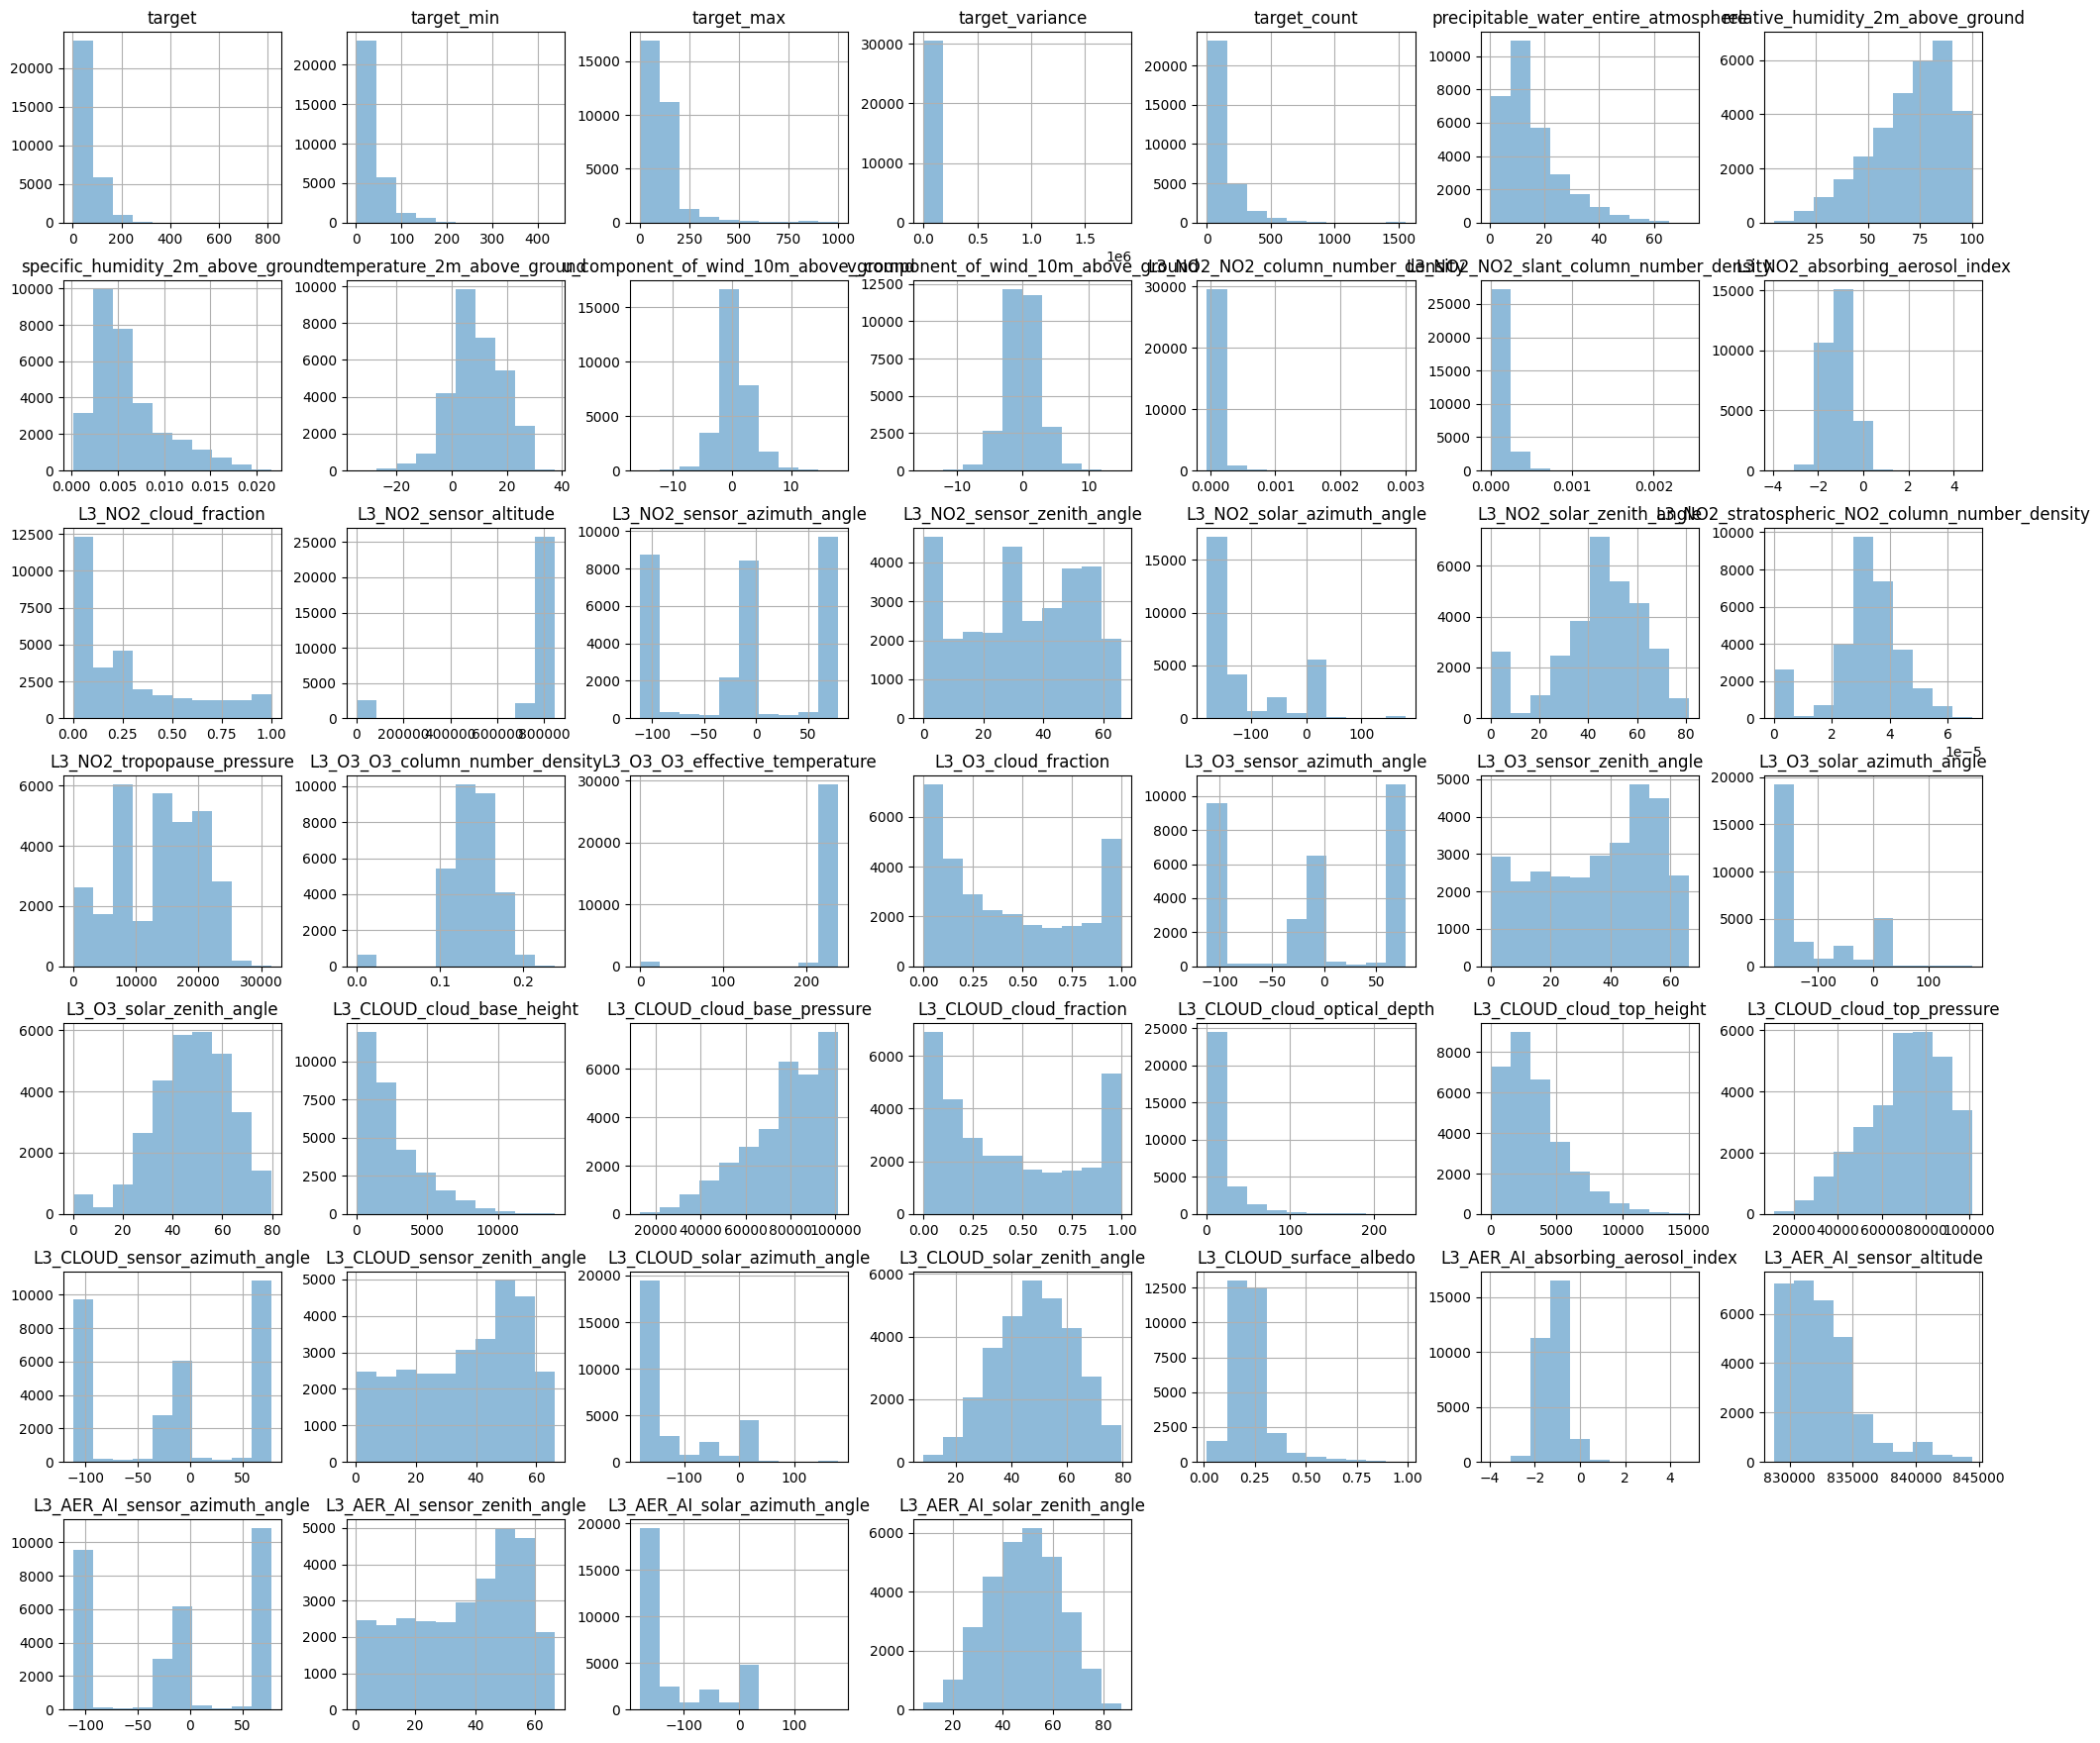

In [ ]:
df_train.select_dtypes(include=['number']).hist(alpha=0.5, figsize=(25, 22))
plt.show()

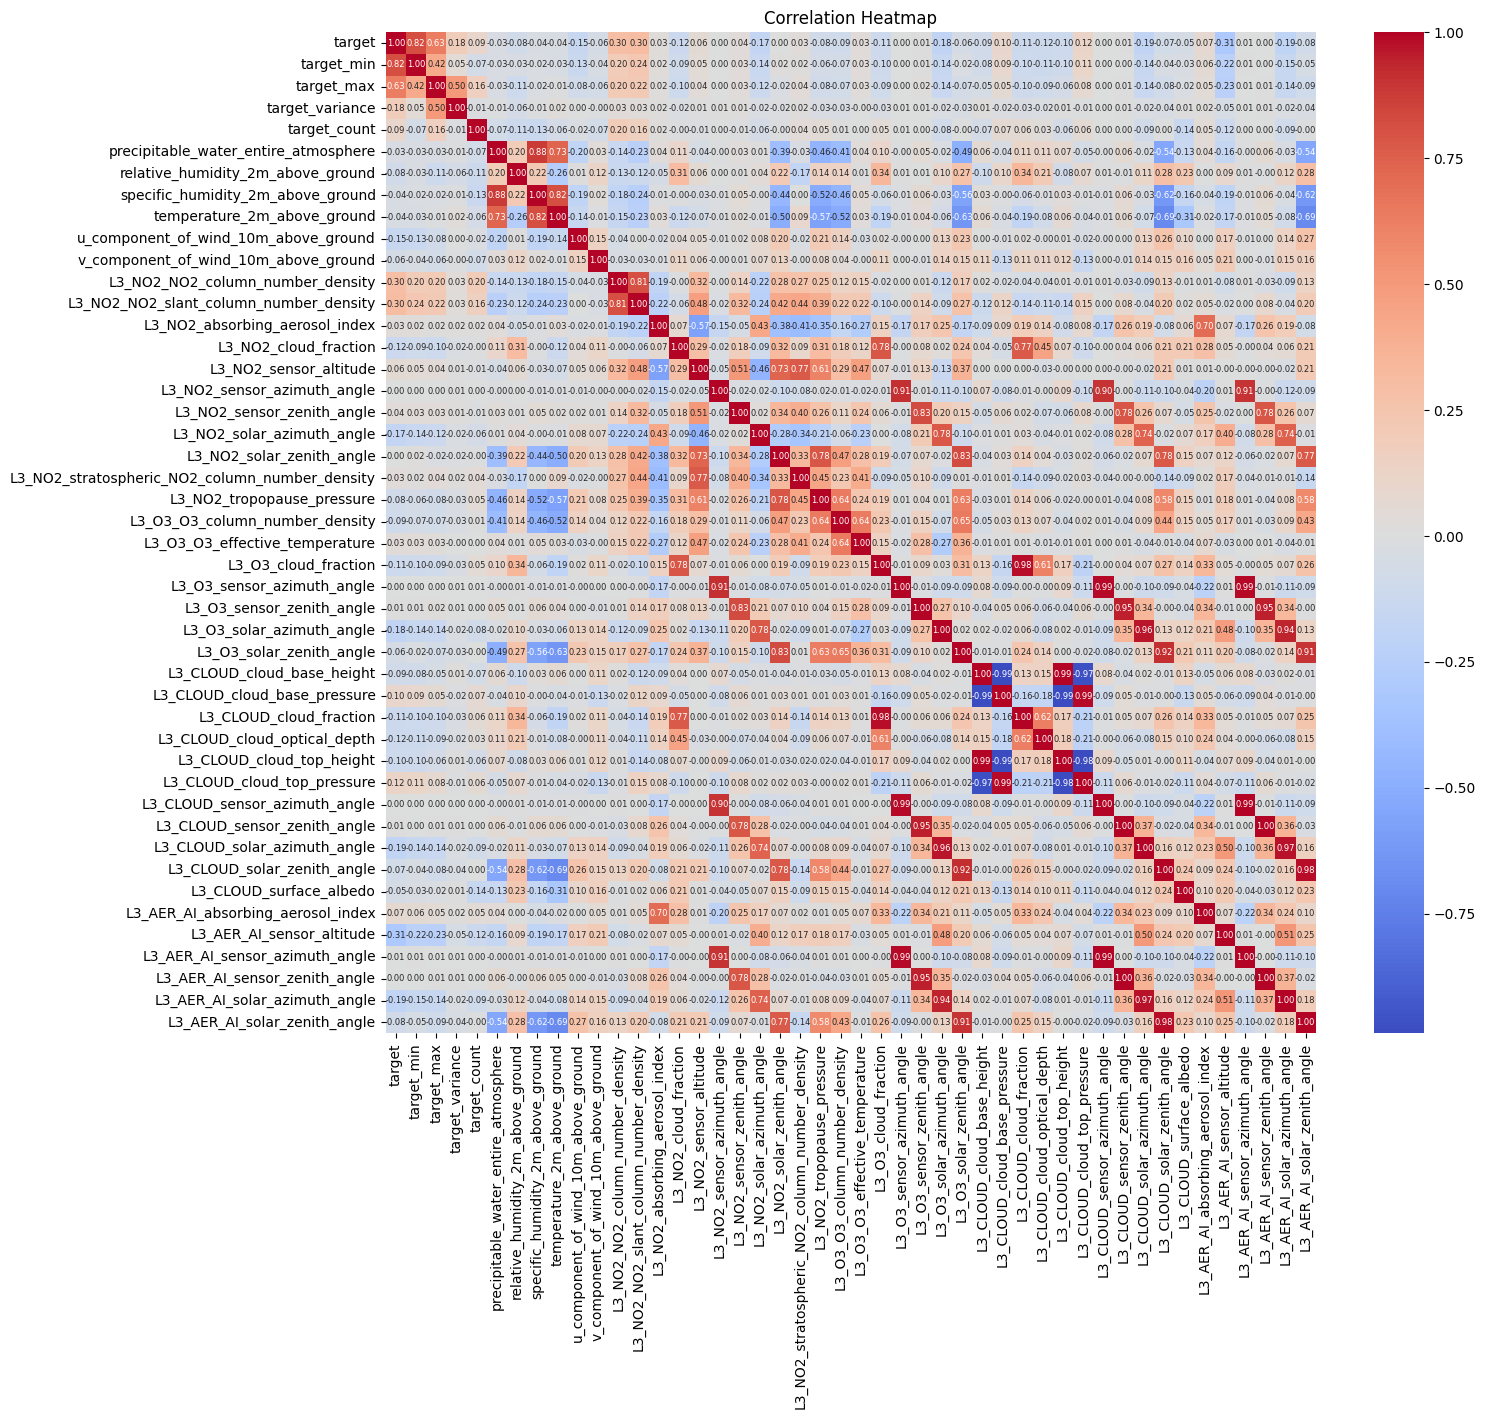

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_train.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 6})
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#columns to drop which are not in test set and not needed for modeling
drop_columns = ['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min', 'target_max', 'target_variance', 'target_count']

## Separating X and y

In [ ]:
# Splitting the data into features (X) and target variable (y)
X = df_train.drop(drop_columns, axis=1)
y = df_train['target']

In [ ]:
# saving the features used for training the model, to be used for the test dataset
features_used_for_training = list(X.columns)
features_used_for_training

['precipitable_water_entire_atmosphere',
 'relative_humidity_2m_above_ground',
 'specific_humidity_2m_above_ground',
 'temperature_2m_above_ground',
 'u_component_of_wind_10m_above_ground',
 'v_component_of_wind_10m_above_ground',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_NO2_absorbing_aerosol_index',
 'L3_NO2_cloud_fraction',
 'L3_NO2_sensor_altitude',
 'L3_NO2_sensor_azimuth_angle',
 'L3_NO2_sensor_zenith_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_NO2_solar_zenith_angle',
 'L3_NO2_stratospheric_NO2_column_number_density',
 'L3_NO2_tropopause_pressure',
 'L3_O3_O3_column_number_density',
 'L3_O3_O3_effective_temperature',
 'L3_O3_cloud_fraction',
 'L3_O3_sensor_azimuth_angle',
 'L3_O3_sensor_zenith_angle',
 'L3_O3_solar_azimuth_angle',
 'L3_O3_solar_zenith_angle',
 'L3_CLOUD_cloud_base_height',
 'L3_CLOUD_cloud_base_pressure',
 'L3_CLOUD_cloud_fraction',
 'L3_CLOUD_cloud_optical_depth',
 'L3_CLOUD_cloud_top_height',
 'L3_CLOUD_cloud_top_pres

In [ ]:
X.shape

(29291, 41)

### Scale X features

In [ ]:
# Initialize StandardScaler from sklearn
#scaler = StandardScaler()

In [ ]:
# Save standardized features into new variable
#X_scaled = scaler.fit_transform(X)
#X = pd.DataFrame(X_scaled, columns=X.columns)
#X.head()

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize LazyRegressor
#reg = LazyRegressor(verbose=0, ignore_warnings=True)

In [ ]:
# Fit LazyRegressor on the training data
#models, predictions = reg.fit(X_train, X_test, y_train, y_test)

In [ ]:
# Print the summary of model performance
print(models)

In [ ]:
# Create a list of regressor models
regressor_models = [
    ("Linear Regression", LinearRegression()),
    ("Lasso Regression", Lasso()),
    ("Ridge Regression", Ridge()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("AdaBoost", AdaBoostRegressor()),
    ("XGBoost", xgb.XGBRegressor())
]

In [ ]:
# Loop through each model
for model_name, model in regressor_models:
    print(f"Fitting {model_name}...")
    # Fit the model
    model.fit(X_train, y_train)
    print(f"Model {model_name} fitted.")

    # Display 5 rows of predictions
    predictions = model.predict(X_test)
    print(f"\nPredictions for {model_name}:")
    print(pd.DataFrame({'Actual': y_test[:5], 'Predicted': predictions[:5]}))

    # Calculate RMSE
    rmse = np.sqrt(MSE(y_test, predictions))
    print(f"\nRMSE for {model_name}: {rmse}\n")

Fitting Linear Regression...
Model Linear Regression fitted.

Predictions for Linear Regression:
       Actual  Predicted
24141   79.00      54.58
26865  129.00      87.01
22772   72.00      64.70
25624   34.00      89.17
21690   61.00      54.94

RMSE for Linear Regression: 40.03525592938686

Fitting Lasso Regression...
Model Lasso Regression fitted.

Predictions for Lasso Regression:
       Actual  Predicted
24141   79.00      61.78
26865  129.00      84.42
22772   72.00      57.30
25624   34.00      85.30
21690   61.00      63.04

RMSE for Lasso Regression: 40.670651907188294

Fitting Ridge Regression...
Model Ridge Regression fitted.

Predictions for Ridge Regression:
       Actual  Predicted
24141   79.00      53.68
26865  129.00      87.14
22772   72.00      63.95
25624   34.00      88.09
21690   61.00      54.52

RMSE for Ridge Regression: 40.059085019973345

Fitting Decision Tree...
Model Decision Tree fitted.

Predictions for Decision Tree:
       Actual  Predicted
24141   79.

### Choosing XGboost as best model

In [ ]:
#rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
XGBoost = xgb.XGBRegressor() #n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42

In [ ]:
# Fitting the model
XGBoost.fit(X_train,y_train)
# Predictions
XGBoost_predict = XGBoost.predict(X_test)

In [ ]:
# evaluate one or more ML models
xgb_Model = pd.DataFrame({'target': y_test, 'Predicted': XGBoost_predict})
xgb_Model.head()

,target,Predicted
18531,117.0,139.025406
13620,53.0,85.731987
11488,152.0,85.002831
2201,67.0,44.871754
8510,29.0,46.881069


In [ ]:
# Calculate RMSE
rmse = np.sqrt(MSE(y_test, XGBoost_predict))
rmse

30.781308321922587

## Submitting the test data predictions to Zindi

In [ ]:
# preprocess the test dataset for model prediction
# remember it was imported earlier in this notebook.
# But let us import it again
# Load Test dataset
df_test = pd.read_csv('Test.csv')
test_data = df_test[features_used_for_training]
test_data.head()

,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,...,L3_CLOUD_sensor_zenith_angle,L3_CLOUD_solar_azimuth_angle,L3_CLOUD_solar_zenith_angle,L3_CLOUD_surface_albedo,L3_AER_AI_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,L3_AER_AI_sensor_azimuth_angle,L3_AER_AI_sensor_zenith_angle,L3_AER_AI_solar_azimuth_angle,L3_AER_AI_solar_zenith_angle
0,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,0.000108,0.466171,0.010752,...,1.445658,-95.984984,22.942019,0.299053,0.466173,835670.492740,68.099367,1.445658,-95.984984,22.942019
1,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,0.000109,-0.213659,0.028307,...,34.639165,-95.017596,18.539491,0.290397,-0.213657,835281.882757,75.936844,34.638933,-95.017976,18.539524
2,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,0.000134,-0.254250,0.010374,...,55.872276,-94.015418,14.140820,0.279277,-0.254250,834839.050781,75.552445,55.872276,-94.015418,14.140820
3,15.011948,53.100002,0.00709,14.441858,5.454001,-0.190532,0.000055,0.000155,-0.268490,0.088795,...,59.174188,-97.247602,32.730553,0.359061,-0.268491,836269.833912,-102.285091,59.174917,-97.248047,32.730747
4,9.700000,71.599998,0.00808,11.896295,3.511787,-0.279441,0.000055,0.000131,0.460720,0.041197,...,40.925873,-96.057265,28.320527,0.331468,0.460720,836043.111009,-102.133960,40.925873,-96.057236,28.320528


In [ ]:
# Fill missing values in numerical columns with their mean values
numerical_columns = test_data.select_dtypes(include=['number']).columns
for col in numerical_columns:
    col_mean = test_data[col].mean()
    test_data[col].fillna(col_mean, inplace=True)

<ipython-input-25-753ecba75221>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col].fillna(col_mean, inplace=True)


In [ ]:
test_data.isnull().sum()

precipitable_water_entire_atmosphere              0
relative_humidity_2m_above_ground                 0
specific_humidity_2m_above_ground                 0
temperature_2m_above_ground                       0
u_component_of_wind_10m_above_ground              0
v_component_of_wind_10m_above_ground              0
L3_NO2_NO2_column_number_density                  0
L3_NO2_NO2_slant_column_number_density            0
L3_NO2_absorbing_aerosol_index                    0
L3_NO2_cloud_fraction                             0
L3_NO2_sensor_altitude                            0
L3_NO2_sensor_azimuth_angle                       0
L3_NO2_sensor_zenith_angle                        0
L3_NO2_solar_azimuth_angle                        0
L3_NO2_solar_zenith_angle                         0
L3_NO2_stratospheric_NO2_column_number_density    0
L3_NO2_tropopause_pressure                        0
L3_O3_O3_column_number_density                    0
L3_O3_O3_effective_temperature                    0
L3_O3_cloud_

In [ ]:
test_data.shape

(16136, 41)

In [ ]:
#the 'place_id x date' is needed for the submission file
place_date = df_test['Place_ID X Date']
place_date

0        0OS9LVX X 2020-01-02
1        0OS9LVX X 2020-01-03
2        0OS9LVX X 2020-01-04
3        0OS9LVX X 2020-01-05
4        0OS9LVX X 2020-01-06
                 ...         
16131    ZZDJZMS X 2020-03-31
16132    ZZDJZMS X 2020-04-01
16133    ZZDJZMS X 2020-04-02
16134    ZZDJZMS X 2020-04-03
16135    ZZDJZMS X 2020-04-04
Name: Place_ID X Date, Length: 16136, dtype: object

In [ ]:
# add the predicted values to the test set
test_data['target'] = XGBoost.predict(test_data)

<ipython-input-28-033f3254c085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['target'] = XGBoost.predict(test_data)


In [ ]:
# add the 'place_id x date' to the test set
test_data['Place_ID X Date'] = place_date

# select only the 'place_id x date' and predicted 'target', creating a new dataset
load = test_data[['Place_ID X Date','target']]
load.to_csv('predicted_target.csv', index = False)
load.head()

<ipython-input-29-21e958c685f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Place_ID X Date'] = place_date


,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,45.562050
1,0OS9LVX X 2020-01-03,25.559772
2,0OS9LVX X 2020-01-04,16.826023
3,0OS9LVX X 2020-01-05,33.190907
4,0OS9LVX X 2020-01-06,24.626358


## Saving our model for deployment on streamlit

In [ ]:
import pickle

model_save_path = "XGBoost_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(XGBoost,file)

## Building a model with only four features to be used for streamlit testing

In [ ]:
# create a model that accepts only four features
features = ['precipitable_water_entire_atmosphere', 'relative_humidity_2m_above_ground',
            'specific_humidity_2m_above_ground', 'temperature_2m_above_ground']

In [ ]:
# Splitting the data into features (X) and target variable (y)
X = df_train[features]
y = df_train['target']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
XGBoost = xgb.XGBRegressor()
rf_reg = RandomForestRegressor()

In [ ]:
# Fitting the model with xgboost
XGBoost.fit(X_train, y_train)


# Fitting the model with random forest
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
import pickle

model_save_path = "XGBoost_model_four_features.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(XGBoost,file)

In [ ]:
model_save_path = "random_forest_model_four_features.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(rf_reg,file)

#### You can also save your model with joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Save the model using joblib
#import joblib
#joblib.dump(XGBoost, 'XGBoost_model_four_features.joblib')

['XGBoost_model_four_features.joblib']